In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv("/Users/anushavan/Desktop/Study/\
Data_Science/Springboard/Capstone_1/data/new_buildings.csv", 
                parse_dates=['Pre- Filing Date','Fully Paid', 
                            'Approved','Fully Permitted','SIGNOFF_DATE'])

/Users/anushavan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118461 entries, 0 to 118460
Data columns (total 23 columns):
Borough                          118461 non-null object
Building Type                    118461 non-null object
eFiling Filed                    49594 non-null object
Applicant Professional Title     118456 non-null object
Professional Cert                84910 non-null object
Pre- Filing Date                 118461 non-null datetime64[ns]
Fully Paid                       117514 non-null datetime64[ns]
Approved                         70616 non-null datetime64[ns]
Fully Permitted                  62940 non-null datetime64[ns]
Total Est. Fee                   118461 non-null object
Proposed Zoning Sqft             118461 non-null int64
Proposed No. of Stories          118461 non-null int64
Proposed Height                  118461 non-null int64
Proposed Dwelling Units          68282 non-null object
Proposed Occupancy               79917 non-null object
Zoning Dist1              

### Clean up the dataframe

* converting all column names to *title case*, <br> 
* converting numeric data into numeric form by removing dollar signs and converting to intiger, <br> 
* creating a **"Duration"** column measuring the duration of the approval process as the difference between the "Approved" and "Fully Paid" columns <br> 
* creating subsets of data to hold normal values, values that are below 0 (meaningless) and zero values.
* Transform "Boroughs" into category to increase the speed of execution.

In [5]:
# Convert all data columns to Title Case
data.columns = data.columns.str.title()

# Convert Total Est. Fee to float data and remove $ symbol 
data['Total Est. Fee']= [float(c.replace('$','')) for c in data['Total Est. Fee']]

In [6]:
# Convert Proposed Dwelling Units to integers
data['Proposed Dwelling Units'] = (pd.to_numeric(data
                                  ['Proposed Dwelling Units'], errors='coerce'))


In [7]:
# Create a Duration column and convert it to integers (instead of days)
data['Duration'] = (data['Approved'] - data['Fully Paid']).dt.days

In [8]:
# Subset of data where the Duration is more than 0 days
data = data[data['Duration'] > 0]

# Subset of data where the Duration is less then 0 days
odd_data = data[data['Duration'] < 0]

# Subset of data where the Duration is 0 days
zero_data = data[data['Duration'] == 0]

In [9]:
# transform the Boroughs into categories for faster analysis.
data['Borough'] = data['Borough'].astype('category')

#### Dealing with blank (NaN/NaT) values

converting the NaN values to N string indicating No.

In [10]:
# Column Efiling Filed: replace the NaN values with N (No)
data['Efiling Filed'] = data['Efiling Filed'].fillna('N')

In [11]:
data['Professional Cert'] = data['Professional Cert'].fillna('N')

##### Potential columns to drop
The column "Proposed Dwelling Units" has 50392 not null values.

The columnn "Fully Permitted" has 7070 NaT entries.


##### Drop rows
There are 2 rows in the "Applicant Professional Title" column that are blank. Assigned them
to del_rows variable and deleted. 

There are also 2 rows in the Processional Cert column that are not Y or N, they should be dropped.

In [12]:
del_rows = data[data['Applicant Professional Title'].isnull()].index
data.drop(del_rows, inplace=True)
data = (data.drop(data[(data['Professional Cert'] == 'J') | 
                            (data['Professional Cert'] == 'R')].index))

### Analysis of data

Createing:
1. histograms (for categorical variables)
2. bar charts (for continuous variables) and 
3. boxplots for categorical variables (x axis) and a continuous variable (y axis).


,Borough
count,5.000000
mean,11815.200000
std,7478.138652
min,2224.000000
25%,7417.000000
50%,11359.000000
75%,17062.000000
max,21014.000000


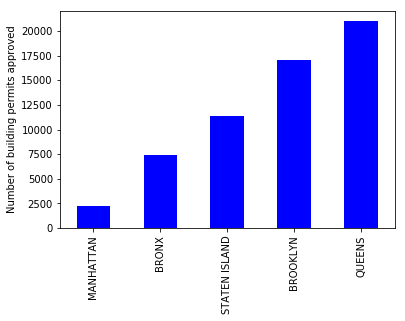

In [13]:
# create a histogram for the # of building permits issued by Borough
ax = data['Borough'].value_counts().sort_values().plot(kind='bar', color = 'b')
ax.set_ylabel('Number of building permits approved')
ax.set_xlabel('')
pd.DataFrame(data['Borough'].value_counts().describe())

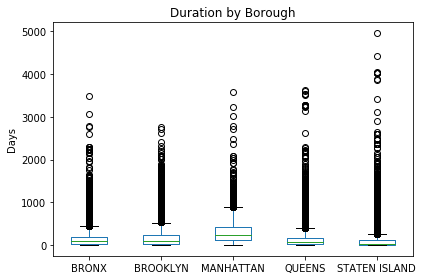

In [14]:
# Create a boxplot of Building Type Duration.
ax = data.boxplot(column=['Duration'], by=['Borough'])
plt.suptitle('')
ax.set_xlabel('')
ax.set_ylabel('Days')
ax.grid(False)
ax.set_title('Duration by Borough')
plt.tight_layout()

,Building Type
count,2.000000
mean,29538.000000
std,18063.749832
min,16765.000000
25%,23151.500000
50%,29538.000000
75%,35924.500000
max,42311.000000


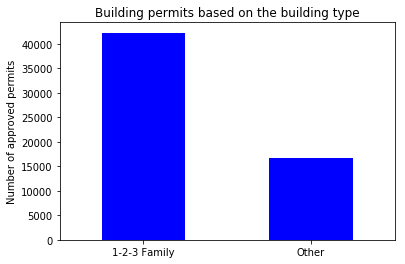

In [15]:
# Create a bar plot of Building Type and include a statistical analysis.
ax = data['Building Type'].value_counts().plot(kind='bar', color='b')
ax.set_xticklabels(['1-2-3 Family', 'Other'],rotation=360)
ax.set_title('Building permits based on the building type')
ax.set_ylabel('Number of approved permits')
pd.DataFrame(data['Building Type'].value_counts().describe())

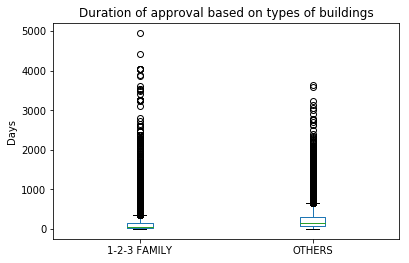

In [16]:
# Create a boxplot of Building Type Duration.
ax = data.boxplot(column=['Duration'], by=['Building Type'])
ax.set_title('Duration of approval based on types of buildings')
ax.set_xlabel('')
ax.set_ylabel('Days')
plt.suptitle('')
ax.grid(False)


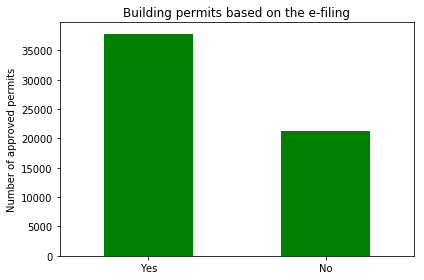

In [17]:
# Create a histogram of Efiling and include a statistical analysis.
ax = data['Efiling Filed'].value_counts().plot(kind='bar', color='g')
ax.set_xticklabels(['Yes','No'],rotation=360)
ax.set_title('Building permits based on the e-filing')
ax.set_ylabel('Number of approved permits')
pd.DataFrame(data['Efiling Filed'].value_counts().describe())
plt.tight_layout()

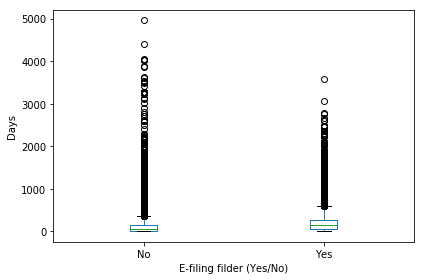

In [18]:
ax = data.boxplot(column=['Duration'], by=['Efiling Filed'])
ax.set_title('')
ax.set_ylabel('Days')
ax.set_xlabel('E-filing filder (Yes/No)')
ax.set_xticklabels(['No','Yes'])
plt.suptitle('')
ax.grid(False)
pd.DataFrame(data.groupby(['Efiling Filed'])['Duration'].describe())
plt.tight_layout()

,count,mean,std,min,25%,50%,75%,max
Applicant Professional Title,,,,,,,,
PE,14990.0,142.513342,229.342644,1.0,22.0,66.0,168.0,4959.0
RA,44086.0,175.552307,268.663775,1.0,27.0,89.0,211.0,4411.0


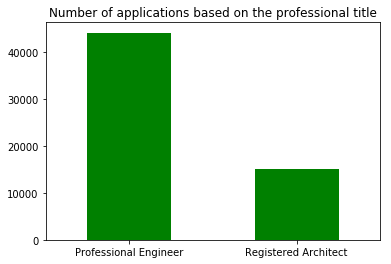

In [19]:
# Create a bar chart of Professional Title and include a statistical analysis.
ax = data['Applicant Professional Title'].value_counts().plot(kind='bar', color='g')
ax.set_xticklabels(['Professional Engineer','Registered Architect'],rotation=360)
ax.set_title('Number of applications based on the professional title')
pd.DataFrame(data.groupby('Applicant Professional Title')['Duration'].describe())

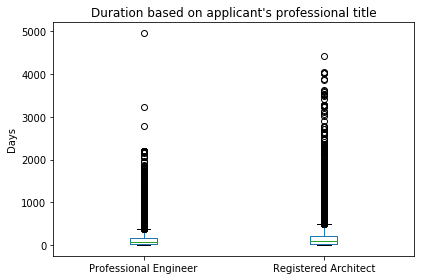

In [20]:
# Boxplot of Duration based on the applicants' professional title.
ax = data.boxplot(column=['Duration'], by=['Applicant Professional Title'])
ax.set_xticklabels(['Professional Engineer','Registered Architect'])
plt.suptitle('')
ax.set_title("Duration based on applicant's professional title")
ax.set_xlabel('')
ax.set_ylabel('Days')
ax.grid(False)
plt.tight_layout()

,count,mean,std,min,25%,50%,75%,max
Professional Cert,,,,,,,,
N,38010.0,225.441594,282.962780,1.0,71.0,138.0,267.0,4959.0
Y,21066.0,62.025966,165.562255,1.0,3.0,13.0,42.0,2589.0


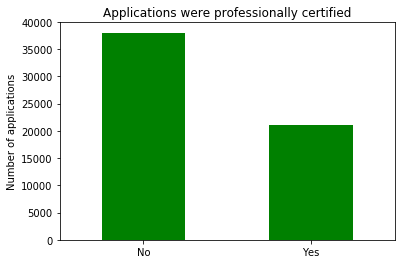

In [21]:
# Bar chart indicating whether or not the application was submitted as 
# Professionally Certified by a Professional Engineer (PE) or Registered Architect (RA).
ax = data['Professional Cert'].value_counts().plot(kind='bar', color='g')
ax.set_xticklabels(['No','Yes'],rotation=360)
ax.set_title('Applications were professionally certified')
ax.set_ylabel('Number of applications')
pd.DataFrame(data.groupby('Professional Cert')['Duration'].describe())


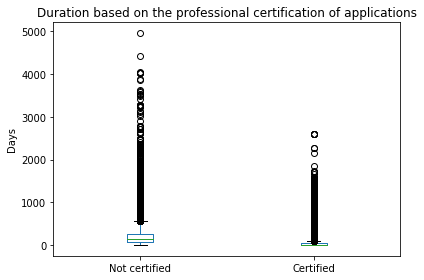

In [22]:
# Boxplot of Duration based on wheather or not the applications were professionally certified.
ax = data.boxplot(column=['Duration'], by=['Professional Cert'])
ax.set_xticklabels(['Not certified','Certified'])
plt.suptitle('')
ax.set_title("Duration based on the professional certification of applications")
ax.set_xlabel('')
ax.set_ylabel('Days')
ax.grid(False)
plt.tight_layout()

In [23]:
# Bar chart indicating whether or not the application was submitted as 
# Professionally Certified by a Professional Engineer (PE) or Registered Architect (RA).
ax = data[' '].value_counts().plot(kind='bar', color='g')
ax.set_xticklabels(['No','Yes'],rotation=360)
ax.set_title('Applications were professionally certified')
ax.set_ylabel('Number of applications')
pd.DataFrame(data.groupby(' ')['Duration'].describe())
plt.tight_layout()

KeyError: ' '

In [ ]:
# Histogram of building permit fee () 
ax = data['Total Est. Fee'].hist(bins=30, range=(0,3500))
ax.set_title('Esimated building permit fees (USD)')
ax.set_xlabel('Building permit fee (USD)')
ax.grid(False)
pd.DataFrame((data['Total Est. Fee']).describe()).round(1)
plt.tight_layout()

In [ ]:
# Boxplot of building permit fee (estimated) in each borough.
ax = sns.boxplot(data=data,x='Borough',y='Total Est. Fee')
ax.set_ylabel('Estimated building permit fee (USD)')
plt.ylim(0,650000)
ax.set_xlabel('')
plt.tight_layout()

In [ ]:
# scatterplot of building permit fee and Duration. 

sns.lmplot(x='Total Est. Fee', y='Duration', data=data)

In [ ]:
# Histogram of Proposed Zoning square footage. 
fig, ax = plt.subplots(2,1)

plt.subplot(2,1,1)
ax = data['Proposed Zoning Sqft'].hist(bins=30, range=(0,3000), color='orange')
ax.set_title('Proposed Zoning square footage')
# ax.set_xlabel('Square feet')
ax.grid(False)
pd.DataFrame((data['Proposed Zoning Sqft']).describe()).round(1)

plt.subplot(2,1,2)
ax1 = data['Proposed Zoning Sqft'].hist(bins=30, range=(100,3000))
ax1.set_title('Proposed Zoning square footage - excluding 0s')
ax1.set_xlabel('Square feet')
ax1.grid(False)
plt.tight_layout()

# scatterplot of proposed zoning square feet vs Duration.
sns.lmplot(x='Proposed Zoning Sqft', y='Duration', data=data)
plt.tight_layout()
plt.xscale('log')
plt.title('Proposed zoning area and the approval duration')

In [ ]:
# Histogram of Proposed No. Of Stories. 
ax = data['Proposed No. Of Stories'].hist(bins=30, range=(0,25))
ax.set_title('Proposed No. Of Stories')
ax.set_xlabel('')
ax.grid(False)
pd.DataFrame((data['Proposed No. Of Stories']).describe()).round(1)
plt.tight_layout()

In [ ]:
# Boxplot of Proposed No. Of Stories in each borough. 
ax = sns.boxplot(data=data,x='Borough', y='Proposed No. Of Stories')
ax.set(ylim=(0,110))
ax.set_xlabel('')
plt.tight_layout()

In [ ]:
# Histogram of Proposed Height. 
ax = data['Proposed Height'].hist(bins=30, range=(0,220))
ax.set_title('Proposed Height')
ax.set_xlabel('Proposed Height (in feet)')
ax.grid(False)
pd.DataFrame((data['Proposed Height']).describe()).round(1)
plt.tight_layout()

In [ ]:
# Boxplot of Proposed Height in each borough. 
ax = sns.boxplot(data=data,x='Borough', y='Proposed Height')
ax.set(ylim=(0,1800))
ax.set_xlabel('')
ax.set_ylabel('Proposed Height (in feet)')
ax.set_title('Proposed Height in each borough')
plt.tight_layout()

In [ ]:
# Histogram of Proposed Height. 
fig,ax = plt.subplots(2,1, sharey=True)
plt.subplot(2,1,1)
ax = data['Proposed Dwelling Units'].hist(bins=30, color='gold')
ax.set_title('Proposed Dwelling Units')
# ax.set_xlabel('Proposed Dwelling Units (Number)')
ax.grid(False)

plt.subplot(2,1,2)
ax1 = data['Proposed Dwelling Units'].hist(bins=30, range=(0,25))
ax1.set_title('Proposed Dwelling Units (subset between 0 and 25)')
ax1.set_xlabel('Proposed Dwelling Units (Number)')
ax1.grid(False)

plt.tight_layout()
pd.DataFrame((data['Proposed Dwelling Units']).describe()).round(1)

In [ ]:
# Boxplot of Proposed Height in each borough. 
ax = sns.boxplot(data=data,x='Borough', y='Proposed Dwelling Units')
ax.set(ylim=(0,1800))
ax.set_xlabel('')
ax.set_ylabel('Proposed Dwelling Units (number)')
ax.set_title('Proposed Dwelling Units in each borough')
plt.tight_layout()

In [ ]:
# bar chart of Proposed Occupancy.

data.groupby('Proposed Occupancy')['Duration'].mean().sort_values()

### Categorical variables that have multiple categories 

#### How to visualize the categorigal variables that have too many categories for a bar chart or box plot?

Zoning, Special Districts and Proposed Occupany variables have multiple categoris each, ranging from 8 (Special District 2) to 43 (Proposed Occupancy) to 164 (Zoning Dist1) and anything in between. 

In [ ]:
data['Proposed Occupancy'].unique()

In [ ]:
# Histogram of Proposed Height. 

fig,ax = plt.subplots(2,1)

plt.subplot(2,1,1)
ax = data['Total_Construction_Floor_Area'].hist(bins=30, color='orange')
ax.set_title('Total_Construction_Floor_Area')
# ax.set_xlabel('Total_Construction_Floor_Area (square feet)')
ax.grid(False)

plt.subplot(2,1,2)
ax1 = data['Total_Construction_Floor_Area'].hist(bins=30,  range=(0,20000))
ax1.set_title('Total_Construction_Floor_Area - cap at 20,000 sqft')
ax1.set_xlabel('Total_Construction_Floor_Area (square feet)')
ax1.grid(False)


plt.tight_layout()
pd.DataFrame((data['Total_Construction_Floor_Area']).describe()).round(1)


In [ ]:
# Create a histogram of duration and include a statistical analysis.
data['Duration'].plot(kind='hist', bins = 200)
plt.xlim(0,1000)
plt.xlabel('Approval duration (days)')
data['Duration'].describe()

In [ ]:
# Duration of the approval in each borough. 
data.groupby('Borough')['Duration'].mean().sort_values().plot(kind='bar', color = 'blue')
plt.xlabel('')
plt.ylabel('Average days for approval')

In [ ]:
ax = (data.groupby('Borough')['Duration'].agg(['mean','median'])
      .sort_values(by='mean').plot(kind='bar'))
ax.set_xlabel('')
ax.set_ylabel('Duration (days)')
ax.set_title('Mean and median duration by borough')

In [ ]:
# scatter plot of Proposed Zoning Sqft (x) Duration (y) 
plt.scatter(x=data['Proposed Zoning Sqft'], y=data['Duration'])


In [ ]:
sns.lmplot(x='Total Est. Fee', y='Duration', data=data)

In [ ]:
data.iloc[:,5:].head(2)

In [ ]:
data['TOTAL_CONSTRUCTION_FLOOR_AREA'].mean()

In [ ]:
data.head(2)

In [ ]:
data.groupby('Building Type')['Duration'].mean().plot(kind='bar')

In [ ]:
# transform the Boroughs into categories for faster analysis.
data['Borough'] = data['Borough'].astype('category')

In [ ]:
(data.groupby(['Borough','Building Type'])['Total_Construction_Floor_Area'].
 sum().sort_values().plot(kind='bar',color='green'))

In [ ]:
normal_data.iloc[:,4:18]

### Selecting outliers

Selecting outliers based on the Total_Construction_Floor_Area variable. Applying a filter to
select values that are +- 3 standard deviation in this variable. Total number of outliers is
517 data points, which is 0.08% of the total data.

In [ ]:
from scipy.stats import zscore

In [ ]:
standardized = (data.
                groupby('Borough')['Total_Construction_Floor_Area'].transform(zscore))

In [ ]:
outliers = standardized[(standardized > 3) | (standardized < -3)]

In [ ]:
outlier_data = data.iloc[outliers]

In [ ]:
outlier_data

In [ ]:
ax = (outlier_data.groupby('Borough').mean()
      ['Duration'].sort_values().plot(kind='bar', color='b'))

ax.set_ylabel('Duration (days)')
ax.set_xlabel('')

In [ ]:
data.head(2)

In [ ]:
by_boro_data = (data.groupby(
    ['Borough','Pre- Filing Date'])['Duration']).agg(['median', 'max', 'min'])